In [21]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('high_diamond_ranked_10min.csv')
pd.set_option("display.max_columns", None) 
df.head(5)

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,blueTotalGold,blueAvgLevel,blueTotalExperience,blueTotalMinionsKilled,blueTotalJungleMinionsKilled,blueGoldDiff,blueExperienceDiff,blueCSPerMin,blueGoldPerMin,redWardsPlaced,redWardsDestroyed,redFirstBlood,redKills,redDeaths,redAssists,redEliteMonsters,redDragons,redHeralds,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,0,0,17210,6.6,17039,195,36,643,-8,19.5,1721.0,15,6,0,6,9,8,0,0,0,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,0,0,14712,6.6,16265,174,43,-2908,-1173,17.4,1471.2,12,1,1,5,5,2,2,1,1,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,0,0,16113,6.4,16221,186,46,-1172,-1033,18.6,1611.3,15,3,1,11,7,14,0,0,0,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,1,0,15157,7.0,17954,201,55,-1321,-7,20.1,1515.7,15,2,1,5,4,10,0,0,0,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,0,0,16400,7.0,18543,210,57,-1004,230,21.0,1640.0,17,2,1,6,6,7,1,1,0,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [3]:
y=df.blueWins
y.value_counts()
drop_cols = ['gameId','blueWins']
x=df.drop(drop_cols,axis=1)
drop_cols = ['redFirstBlood','redKills','redDeaths'
             ,'redGoldDiff','redExperienceDiff', 'blueCSPerMin',
            'blueGoldPerMin','redCSPerMin','redGoldPerMin']
x.drop(drop_cols,axis=1,inplace=True)


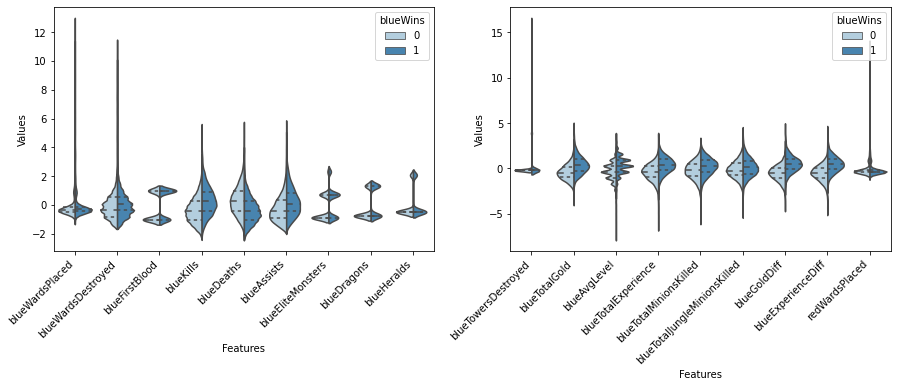

In [4]:
data =x
data_std = (data-data.mean())/data.std()
data = pd.concat([y,data_std.iloc[:,0:9]],axis=1)
data=pd.melt(data,id_vars='blueWins',var_name='Features',value_name='Values')
fig,ax=plt.subplots(1,2,figsize=(15,5))
sns.violinplot(x='Features',y='Values',hue='blueWins',data=data,split=True,inner='quart',ax=ax[0],palette='Blues')
fig.autofmt_xdate(rotation=45)

data=x
data_std = (data - data.mean()) / data.std()
data = pd.concat([y, data_std.iloc[:, 9:18]], axis=1)
data = pd.melt(data, id_vars='blueWins', var_name='Features', value_name='Values')
sns.violinplot(x='Features',y='Values',hue='blueWins',data=data,split=True,inner='quart',ax=ax[1],palette='Blues')

fig.autofmt_xdate(rotation=45)

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


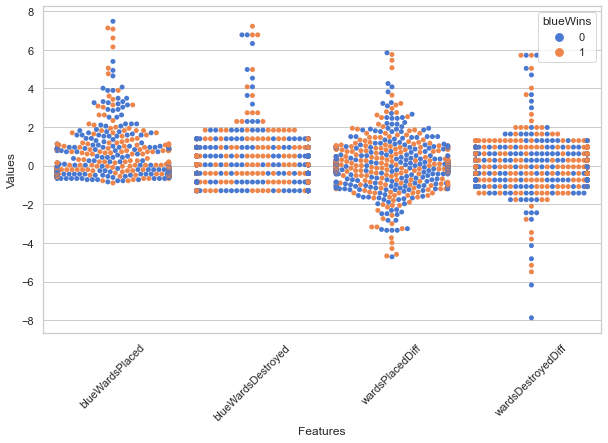

In [5]:
drop_cols = ['redAvgLevel','blueAvgLevel']
x.drop(drop_cols, axis=1, inplace=True)
sns.set(style='whitegrid',palette='muted')
x['wardsPlacedDiff']=x['blueWardsPlaced']-x['redWardsPlaced']
x['wardsDestroyedDiff']=x['blueWardsDestroyed']-x['redWardsDestroyed']
data=x[['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff','wardsDestroyedDiff']].sample(1000)
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std],axis=1)
data=pd.melt(data,id_vars='blueWins',var_name='Features',value_name='Values')
plt.figure(figsize=(10,6))
sns.swarmplot(x='Features',y='Values',hue='blueWins',data=data)
plt.xticks(rotation=45)
plt.show()

In [6]:
drop_cols = ['blueWardsPlaced','blueWardsDestroyed','wardsPlacedDiff',
            'wardsDestroyedDiff','redWardsPlaced','redWardsDestroyed']
x.drop(drop_cols, axis=1, inplace=True)

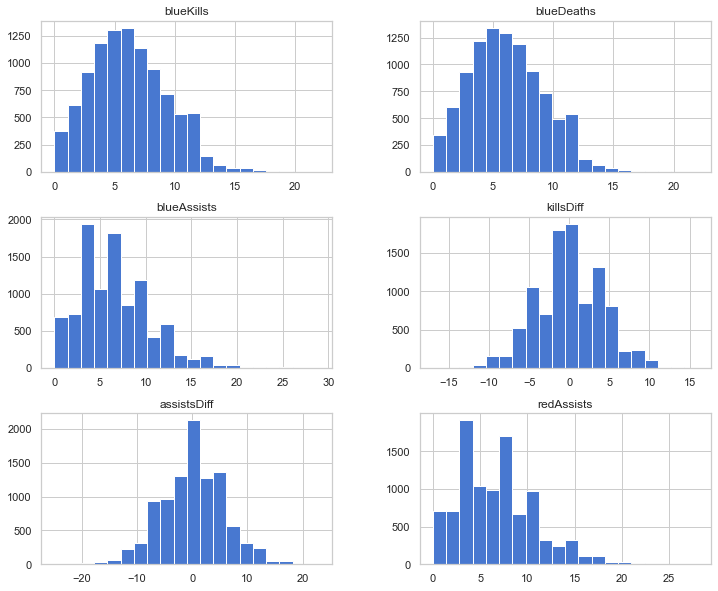

In [7]:
x['killsDiff']=x['blueKills']-x['blueDeaths']
x['assistsDiff']=x['blueAssists']-x['redAssists']
x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].hist(figsize=(12,10),bins=20)
plt.show()

/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 8.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 7.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/yanshuo/opt/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:1296: UserWarning: 6.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


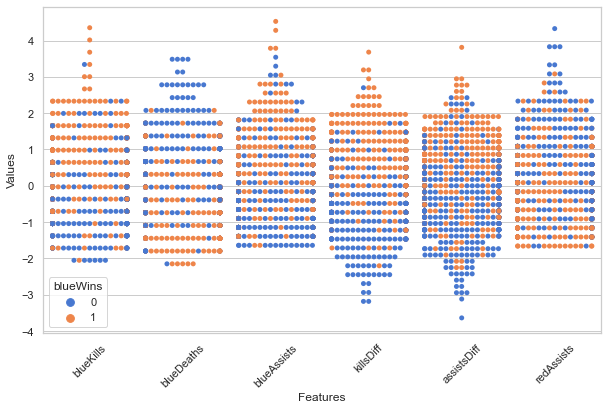

In [8]:
data=x[['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists']].sample(1000)
data_std=(data-data.mean())/data.std()
data=pd.concat([y,data_std],axis=1)
data=pd.melt(data,id_vars='blueWins',var_name='Features',value_name='Values')
plt.figure(figsize=(10,6))
sns.swarmplot(x='Features',y='Values',hue='blueWins',data=data)
plt.xticks(rotation=45)
plt.show()

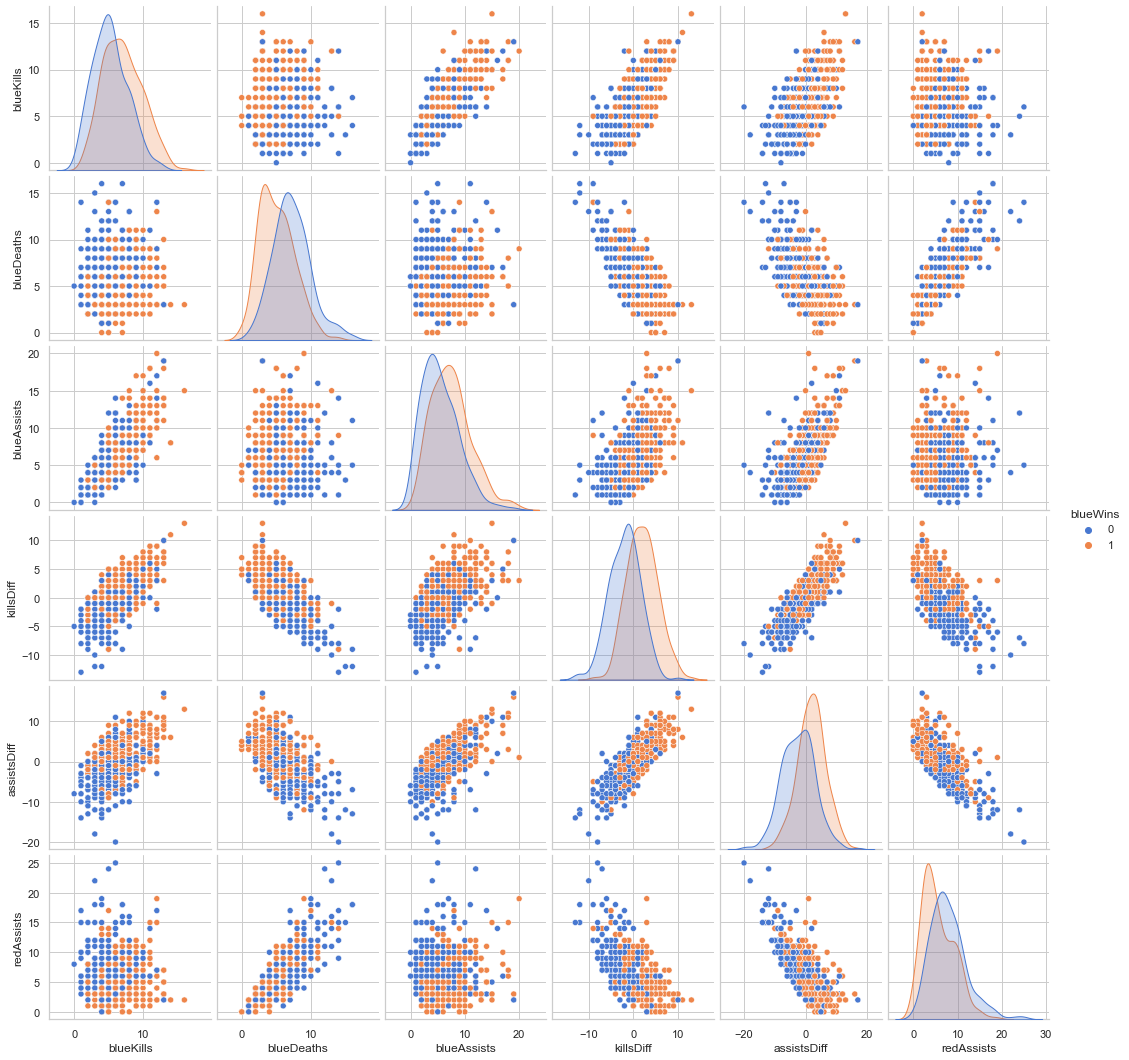

In [9]:
data=pd.concat([y,x],axis=1).sample(500)
sns.pairplot(data,vars=['blueKills','blueDeaths','blueAssists','killsDiff','assistsDiff','redAssists'], 
             hue='blueWins')
plt.show()

eliteDiff
-2    0.286301
-1    0.368772
 0    0.500683
 1    0.632093
 2    0.735211
Name: blueWins, dtype: float64
dragonsDiff
-1    0.374173
 0    0.500000
 1    0.640940
Name: blueWins, dtype: float64
heraldsDiff
-1    0.387729
 0    0.498680
 1    0.595046
Name: blueWins, dtype: float64


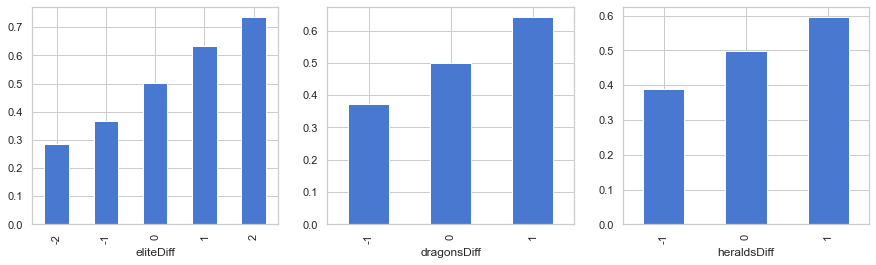

In [10]:
x['dragonsDiff'] = x['blueDragons'] - x['redDragons']
x['heraldsDiff'] = x['blueHeralds'] - x['redHeralds']
x['eliteDiff'] = x['blueEliteMonsters'] - x['redEliteMonsters']
data=pd.concat([y,x],axis=1)
eliteGroup=data.groupby(['eliteDiff'])['blueWins'].mean()
dragonGroup=data.groupby(['dragonsDiff'])['blueWins'].mean()
heraldGroup=data.groupby(['heraldsDiff'])['blueWins'].mean()
fig,ax = plt.subplots(1,3,figsize=(15,4))
eliteGroup.plot(kind='bar',ax=ax[0])
dragonGroup.plot(kind='bar',ax=ax[1])
heraldGroup.plot(kind='bar',ax=ax[2])
print(eliteGroup)
print(dragonGroup)
print(heraldGroup)
plt.show()

towerDiff
-2      27
-1     347
 0    9064
 1     406
 2      28
 3       6
 4       1
Name: blueWins, dtype: int64
towerDiff
-2    0.185185
-1    0.216138
 0    0.498124
 1    0.741379
 2    0.964286
 3    1.000000
 4    1.000000
Name: blueWins, dtype: float64


Text(0, 0.5, 'Count')

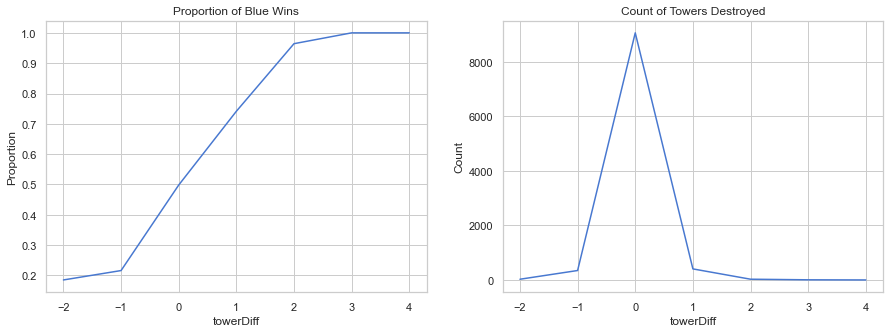

In [11]:
x['towerDiff']=x['blueTowersDestroyed']-x['redTowersDestroyed']
data=pd.concat([y,x],axis=1)
towerGroup=data.groupby(['towerDiff'])['blueWins']
print(towerGroup.count())
print(towerGroup.mean())
fig,ax=plt.subplots(1,2,figsize=(15,5))
towerGroup.mean().plot(kind='line',ax=ax[0])
ax[0].set_title('Proportion of Blue Wins')
ax[0].set_ylabel('Proportion')
towerGroup.count().plot(kind='line',ax=ax[1])
ax[1].set_title('Count of Towers Destroyed')
ax[1].set_ylabel('Count')

In [12]:
from sklearn.model_selection import train_test_split
data_target_part=y
data_features_part=x
x_train,x_test,y_train,y_test=train_test_split(data_features_part,data_target_part,test_size=0.2,random_state=2021)

In [13]:
from lightgbm import LGBMClassifier
clf = LGBMClassifier()
clf.fit(x_train,y_train)

LGBMClassifier()

In [15]:
y_predict=clf.predict(x_test)
from sklearn import metrics
print(metrics.accuracy_score(y_predict,y_test))

0.7125506072874493


<AxesSubplot:>

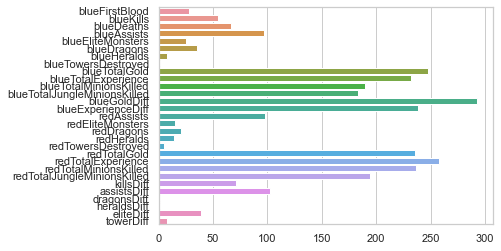

In [17]:
sns.barplot(y=data_features_part.columns,x=clf.feature_importances_)

0.7125506072874493


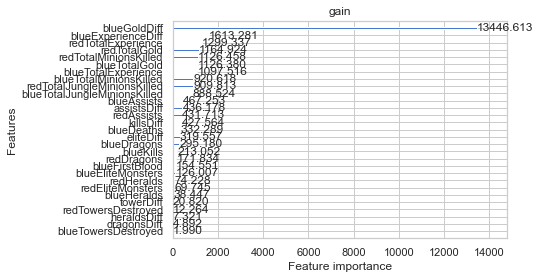

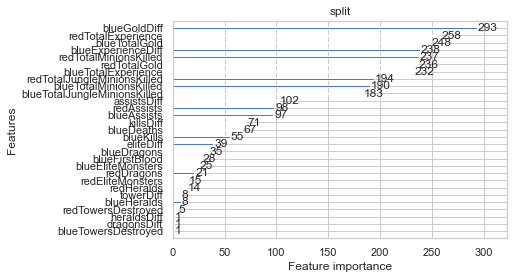

In [20]:
from sklearn.metrics import accuracy_score
from lightgbm import plot_importance
def estimate(model):
    ax1=plot_importance(model,importance_type='gain')
    ax1.set_title('gain')
    ax2=plot_importance(model,importance_type='split')
    ax2.set_title('split')
    
def classes(data,label,test):
    model=LGBMClassifier()
    model.fit(data,label)
    ans=model.predict(test)
    estimate(model)
    return ans
ans=classes(x_train,y_train,x_test)
pre=accuracy_score(y_test,ans)
print(pre)

In [22]:
from sklearn.model_selection import GridSearchCV
learn_rate=[0.1,0.3,0.6]
feature_fraction=[0.5,0.8,1]
num_leaves=[16,32,64]
max_depth=[-1,3,5,8]
parameters={'laering_rate':learn_rate,
           'feature_fraction':feature_fraction,
           'num_leaves':num_leaves,
           'max_depth':max_depth}
model=LGBMClassifier(n_estimators=50)
clf=GridSearchCV(model,parameters,cv=3,scoring='accuracy',verbose=3,n_jobs=-1)
clf=clf.fit(x_train,y_train)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[LightGBM] [Warning] Unknown parameter: laering_rate
[LightGBM] [Warning] feature_fraction is set=0.5, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5


In [23]:
clf.best_params_

{'feature_fraction': 0.5,
 'laering_rate': 0.1,
 'max_depth': 3,
 'num_leaves': 16}

In [24]:
clf = LGBMClassifier(feature_fraction=0.8,
                     learning_rate=0.1,
                     max_depth=3,
                     num_leaves=16)
clf.fit(x_train,y_train)

LGBMClassifier(feature_fraction=0.8, max_depth=3, num_leaves=16)

In [25]:
test_predict = clf.predict(x_test)
print(metrics.accuracy_score(test_predict,y_test))

0.7125506072874493


The confusion matrix result:
 [[706 268]
 [300 702]]


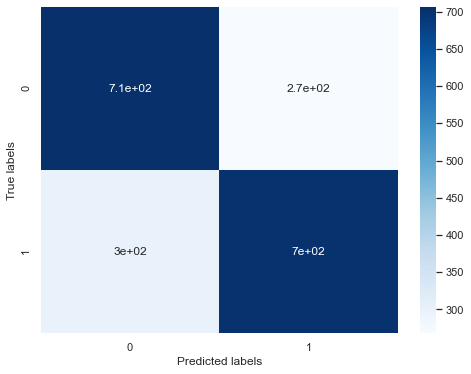

In [26]:
confusion_matrix_result = metrics.confusion_matrix(test_predict,y_test)
print('The confusion matrix result:\n',confusion_matrix_result)

# 利用热力图对于结果进行可视化
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()